# Modelamiento

*X1: Credito dado en Nuevos Dolares Taiwaneses.*

*X2: Genero: 1 = masculino, 2 = femenino.*

*X3: Educación: 1 = Postgrado, 2 = Universitario, 3 = Bachillerato, 4 = otro.*

*X4: Estado marital: 1 = casado/a, 2 = soltero/a, 3 = otro.*

*X5: Edad en años.*

*X6 - X11: Estado de la deuda entre Abril y Septiembre 2005. X6 corresponde a Septiembre 2005 y X11 corresponde a Abril 2005. Los valores hacen referencia a: Pagado = -1, Pago atrasado 1 mes = 1, Pago atrasado 2 meses = 2, .... , Pago atrasado 8 meses = 8, Pago atrasado 9 meses o más = 9.*

*X12 - X17: Saldo pendiente por pagar en Nuevos Dolares Taiwaneses. X12 corresponde a Septiembre 2005 y X17 corresponde a Abril 2005.*

*X18 - X23: Pago de deuda en un mes en Nuevos Dolares Taiwaneses. X18 corresponde al pago en el mes de Septiembre 2005 y X23 corresponde al pago en el mes de Abril 2005.*

*Y: Variable de respuesta donde se determina si un pago hace "default" el proximo mes. Toma el valor de 1 si el pago hace default, 0 si no hace default.*

## Importar datos

In [1]:
import sys
from packaging import version
import sklearn
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df=pd.read_csv("Datos Modelamiento.csv")

## Se inicia con la búsqueda de aquellos parámetros (x´s) que me mejoran el Test Accuracy

### Todas las variables

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

X = df[["X1","X2","X3","X4","X5","X6","X7","X8","X9","X10","X11","X12","X13","X14","X15","X16","X17","X18","X19","X20","X21","X22","X23","X24","X25","X26","X27","X28","X29"]]
Y = df['Y']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10


c:\Users\ATova\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


512/512 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6619 - loss: 1117.7996 - val_accuracy: 0.5977 - val_loss: 225.2805
Epoch 2/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6721 - loss: 208.9396 - val_accuracy: 0.7531 - val_loss: 258.7716
Epoch 3/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6883 - loss: 188.6716 - val_accuracy: 0.7421 - val_loss: 158.0989
Epoch 4/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6835 - loss: 165.5310 - val_accuracy: 0.7447 - val_loss: 118.9682
Epoch 5/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6768 - loss: 154.4736 - val_accuracy: 0.6500 - val_loss: 96.9033
Epoch 6/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6852 - loss: 123.7260 - val_accuracy: 0.7306 - val_loss: 103.8637
Epoch 7/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6856 - loss: 85.1747 - val_accuracy: 0.7560 - val_loss: 65.8592
Epoch 8/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6838 - loss: 86.8385 - 

### Solo las variables numéricas

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

X = df[["X1","X5","X12","X13","X14","X15","X16","X17","X18","X19","X20","X21","X22","X23"]]
Y = df['Y']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
512/512 [==============================] - 2s 3ms/step - loss: 407.2944 - accuracy: 0.6784 - val_loss: 242.2872 - val_accuracy: 0.7548
Epoch 2/10
512/512 [==============================] - 1s 2ms/step - loss: 138.5251 - accuracy: 0.6853 - val_loss: 108.4363 - val_accuracy: 0.7220
Epoch 3/10
512/512 [==============================] - 1s 2ms/step - loss: 118.0995 - accuracy: 0.6803 - val_loss: 49.5598 - val_accuracy: 0.6979
Epoch 4/10
512/512 [==============================] - 1s 2ms/step - loss: 82.3632 - accuracy: 0.6832 - val_loss: 41.6443 - val_accuracy: 0.7062
Epoch 5/10
512/512 [==============================] - 1s 2ms/step - loss: 73.2675 - accuracy: 0.6791 - val_loss: 57.8684 - val_accuracy: 0.6424
Epoch 6/10
512/512 [==============================] - 1s 2ms/step - loss: 64.6024 - accuracy: 0.6860 - val_loss: 69.8966 - val_accuracy: 0.7557
Epoch 7/10
512/512 [==============================] - 1s 2ms/step - loss: 53.1060 - accuracy: 0.6837 - val_loss: 37.8246 - val_accu

### Solo las variables categóricas

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

X = df[["X2","X3","X4","X6","X7","X8","X9","X10","X11","X24","X25","X26","X27","X28","X29"]]
Y = df['Y']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
512/512 [==============================] - 2s 3ms/step - loss: 0.4565 - accuracy: 0.8045 - val_loss: 0.4630 - val_accuracy: 0.8056
Epoch 2/10
512/512 [==============================] - 1s 2ms/step - loss: 0.4483 - accuracy: 0.8098 - val_loss: 0.4629 - val_accuracy: 0.8046
Epoch 3/10
512/512 [==============================] - 1s 2ms/step - loss: 0.4482 - accuracy: 0.8117 - val_loss: 0.4636 - val_accuracy: 0.8041
Epoch 4/10
512/512 [==============================] - 1s 2ms/step - loss: 0.4467 - accuracy: 0.8124 - val_loss: 0.4690 - val_accuracy: 0.8036
Epoch 5/10
512/512 [==============================] - 1s 2ms/step - loss: 0.4460 - accuracy: 0.8126 - val_loss: 0.4679 - val_accuracy: 0.8000
Epoch 6/10
512/512 [==============================] - 1s 2ms/step - loss: 0.4455 - accuracy: 0.8122 - val_loss: 0.4672 - val_accuracy: 0.7990
Epoch 7/10
512/512 [==============================] - 1s 2ms/step - loss: 0.4449 - accuracy: 0.8119 - val_loss: 0.4648 - val_accuracy: 0.8019
Epoch 

### Variables significativas de un modelo de regresión logística

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

X = df[["X1","X2","X3","X4","X6","X7","X8","X9","X10","X11","X12","X13","X14","X18","X19","X24","X25","X26","X27","X29"]]
Y = df['Y']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
512/512 [==============================] - 2s 3ms/step - loss: 229.4151 - accuracy: 0.6751 - val_loss: 80.6960 - val_accuracy: 0.6392
Epoch 2/10
512/512 [==============================] - 1s 2ms/step - loss: 112.5727 - accuracy: 0.6848 - val_loss: 42.6647 - val_accuracy: 0.6473
Epoch 3/10
512/512 [==============================] - 1s 2ms/step - loss: 86.6106 - accuracy: 0.6799 - val_loss: 119.8271 - val_accuracy: 0.4179
Epoch 4/10
512/512 [==============================] - 1s 2ms/step - loss: 74.5811 - accuracy: 0.6836 - val_loss: 89.2815 - val_accuracy: 0.3908
Epoch 5/10
512/512 [==============================] - 1s 2ms/step - loss: 83.5280 - accuracy: 0.6813 - val_loss: 200.7564 - val_accuracy: 0.7557
Epoch 6/10
512/512 [==============================] - 1s 2ms/step - loss: 76.3775 - accuracy: 0.6861 - val_loss: 66.1626 - val_accuracy: 0.5620
Epoch 7/10
512/512 [==============================] - 1s 2ms/step - loss: 67.3734 - accuracy: 0.6869 - val_loss: 52.5798 - val_accur

### Hasta este punto, es mejor usar solo el de variables categóricas. Por esto entonces se valida si la inclusión de alguna variable numérica mejora el Test Accuracy

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

X = df[["X2","X3","X4","X5","X6","X7","X8","X9","X10","X11","X24","X25","X26","X27","X28","X29"]]
Y = df['Y']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
512/512 [==============================] - 2s 3ms/step - loss: 0.4704 - accuracy: 0.7998 - val_loss: 0.4906 - val_accuracy: 0.7929
Epoch 2/10
512/512 [==============================] - 1s 2ms/step - loss: 0.4570 - accuracy: 0.8054 - val_loss: 0.5099 - val_accuracy: 0.7853
Epoch 3/10
512/512 [==============================] - 1s 2ms/step - loss: 0.4571 - accuracy: 0.8081 - val_loss: 0.4674 - val_accuracy: 0.8068
Epoch 4/10
512/512 [==============================] - 1s 2ms/step - loss: 0.4558 - accuracy: 0.8085 - val_loss: 0.4673 - val_accuracy: 0.8073
Epoch 5/10
512/512 [==============================] - 1s 2ms/step - loss: 0.4546 - accuracy: 0.8082 - val_loss: 0.4743 - val_accuracy: 0.7987
Epoch 6/10
512/512 [==============================] - 1s 2ms/step - loss: 0.4521 - accuracy: 0.8091 - val_loss: 0.4706 - val_accuracy: 0.7978
Epoch 7/10
512/512 [==============================] - 1s 2ms/step - loss: 0.4531 - accuracy: 0.8093 - val_loss: 0.4772 - val_accuracy: 0.7978
Epoch 

### Incluir la edad no mejora el Test Accuracy, sin embargo tampoco lo desmejora significativamente. Por esto, se considera dejar la edad en el modelo pues puede ser interesante incluirla y obtener un análisis con esta variable

#### Finalmente entonces las variables a tener en cuenta para modelar la red son:

In [11]:
X = df[["X2","X3","X4","X5","X6","X7","X8","X9","X10","X11","X24","X25","X26","X27","X28","X29"]]

## El siguiente paso es encontrar que parámetros me cambian favorablemente el Test Accuracy

### Se evaluan primeramente diferentes optimizadores

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

# Lista de optimizadores
optimizers = ['adam', 'sgd', 'adadelta', 'adamax', 'nadam', 'ftrl', 'rmsprop']

test_accuracies = []

for optimizer in optimizers:
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

    test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
    test_accuracies.append(test_accuracy)
    print(f"Test Accuracy with {optimizer}: {test_accuracy}")

# Imprimir los resultados
for i, optimizer in enumerate(optimizers):
    print(f"Test Accuracy with {optimizer}: {test_accuracies[i]}")



Test Accuracy with adam: 0.8125854730606079
Test Accuracy with sgd: 0.8104358315467834
Test Accuracy with adadelta: 0.7805354595184326
Test Accuracy with adamax: 0.8127809166908264
Test Accuracy with nadam: 0.8131718039512634
Test Accuracy with ftrl: 0.7678326964378357
Test Accuracy with rmsprop: 0.8108266592025757
Test Accuracy with adam: 0.8125854730606079
Test Accuracy with sgd: 0.8104358315467834
Test Accuracy with adadelta: 0.7805354595184326
Test Accuracy with adamax: 0.8127809166908264
Test Accuracy with nadam: 0.8131718039512634
Test Accuracy with ftrl: 0.7678326964378357
Test Accuracy with rmsprop: 0.8108266592025757


In [18]:
best_optimizer = optimizers[test_accuracies.index(max(test_accuracies))]
best_accuracy = max(test_accuracies)

print(f"El optimizador con la mayor precisión es '{best_optimizer}' con una precisión de {best_accuracy}")


El optimizador con la mayor precisión es 'nadam' con una precisión de 0.8131718039512634


#### Nadam es entonces el optimizador que tiene mayor Test Accuracy

### Se evalua entonces el tipo de capas y si este factor cambia favorablemente el Test Accuracy

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

activation_functions = ['relu', 'tanh', 'elu', 'selu']
test_accuracies = {}

for activation1 in activation_functions:
    for activation2 in activation_functions:
        model = keras.Sequential([
            layers.Dense(64, activation=activation1, input_shape=(X_train.shape[1],)),
            layers.Dense(32, activation=activation2),
            layers.Dense(1, activation='sigmoid')
        ])

        model.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])

        history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

        test_loss, test_accuracy = model.evaluate(X_test, Y_test)
        
        test_accuracies[(activation1, activation2)] = test_accuracy
        
        print(f"Test Accuracy with {activation1} activation in layer 1 and {activation2} activation in layer 2: {test_accuracy}")

best_config = max(test_accuracies, key=test_accuracies.get)
best_accuracy = test_accuracies[best_config]

print(f"La mejor configuración es {best_config} con un test accuracy de {best_accuracy}")


160/160 [==============================] - 0s 2ms/step - loss: 0.4552 - accuracy: 0.8087
Test Accuracy with relu activation in layer 1 and relu activation in layer 2: 0.8086769580841064
160/160 [==============================] - 0s 1ms/step - loss: 0.4483 - accuracy: 0.8141
Test Accuracy with relu activation in layer 1 and tanh activation in layer 2: 0.8141489028930664
160/160 [==============================] - 0s 1ms/step - loss: 0.4488 - accuracy: 0.8124
Test Accuracy with relu activation in layer 1 and elu activation in layer 2: 0.8123900890350342
160/160 [==============================] - 0s 1ms/step - loss: 0.4669 - accuracy: 0.8065
Test Accuracy with relu activation in layer 1 and selu activation in layer 2: 0.8065272569656372
160/160 [==============================] - 0s 1ms/step - loss: 0.4548 - accuracy: 0.8112
Test Accuracy with tanh activation in layer 1 and relu activation in layer 2: 0.8112174868583679
160/160 [==============================] - 0s 1ms/step - loss: 0.4618 -

#### La mejor combinación de capas es elu y tanh

### Ahora se evalúa el número de neuronas para cada capa

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

# Definir la lista de números de neuronas para las capas ocultas
neurons_layer1 = [16, 32, 64, 128]
neurons_layer2 = [8, 16, 32, 64]

test_accuracies = {}

for neurons1 in neurons_layer1:
    for neurons2 in neurons_layer2:
        model = keras.Sequential([
            layers.Dense(neurons1, activation='elu', input_shape=(X_train.shape[1],)),
            layers.Dense(neurons2, activation='tanh'),
            layers.Dense(1, activation='sigmoid')
        ])

        model.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])

        history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

        test_loss, test_accuracy = model.evaluate(X_test, Y_test)
        
        test_accuracies[(neurons1, neurons2)] = test_accuracy
        
        print(f"Test Accuracy with {neurons1} neurons in layer 1 and {neurons2} neurons in layer 2: {test_accuracy}")

best_config = max(test_accuracies, key=test_accuracies.get)
best_accuracy = test_accuracies[best_config]

print(f"The best configuration is {best_config} with a test accuracy of {best_accuracy}")


160/160 [==============================] - 0s 1ms/step - loss: 0.4470 - accuracy: 0.8145
Test Accuracy with 16 neurons in layer 1 and 8 neurons in layer 2: 0.8145397901535034
160/160 [==============================] - 0s 2ms/step - loss: 0.4477 - accuracy: 0.8130
Test Accuracy with 16 neurons in layer 1 and 16 neurons in layer 2: 0.8129763603210449
160/160 [==============================] - 0s 1ms/step - loss: 0.4525 - accuracy: 0.8095
Test Accuracy with 16 neurons in layer 1 and 32 neurons in layer 2: 0.8094586730003357
160/160 [==============================] - 0s 1ms/step - loss: 0.4488 - accuracy: 0.8118
Test Accuracy with 16 neurons in layer 1 and 64 neurons in layer 2: 0.8118038177490234
160/160 [==============================] - 0s 1ms/step - loss: 0.4515 - accuracy: 0.8061
Test Accuracy with 32 neurons in layer 1 and 8 neurons in layer 2: 0.806136429309845
160/160 [==============================] - 0s 1ms/step - loss: 0.4473 - accuracy: 0.8140
Test Accuracy with 32 neurons in l

#### La mejor configuración de neuronas es entonces 64 y 8

## Finalmente se obtienen entonces la siguiente red

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

X = df[["X2","X3","X4","X5","X6","X7","X8","X9","X10","X11","X24","X25","X26","X27","X28","X29"]]
Y = df['Y']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = keras.Sequential([
    layers.Dense(64, activation='elu', input_shape=(X_train.shape[1],)),
    layers.Dense(8, activation='tanh'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10


c:\Users\ATova\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


512/512 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7196 - loss: 0.5872 - val_accuracy: 0.8024 - val_loss: 0.4723
Epoch 2/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8049 - loss: 0.4585 - val_accuracy: 0.8046 - val_loss: 0.4668
Epoch 3/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8128 - loss: 0.4509 - val_accuracy: 0.8061 - val_loss: 0.4659
Epoch 4/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8122 - loss: 0.4467 - val_accuracy: 0.7985 - val_loss: 0.4674
Epoch 5/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8095 - loss: 0.4468 - val_accuracy: 0.8065 - val_loss: 0.4640
Epoch 6/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8109 - loss: 0.4457 - val_accuracy: 0.7980 - val_loss: 0.4687
Epoch 7/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8165 - loss: 0.4403 - val_accuracy: 0.8029 - val_loss: 0.4649
Epoch 8/10
512/512 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8111 - loss: 0.4460 - val_accuracy: 0.8036 - val_

## Predicciones del modelo

In [6]:
predictions = model.predict(X_test)

binary_predictions = (predictions > 0.5).astype("int32")

X_test_df = pd.DataFrame(X_test, columns=X.columns)

results_df = X_test_df.copy()
results_df['Predictions'] = binary_predictions
results_df['Actual Labels'] = Y_test.values

print(results_df.head(10))

160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
       X2  X3  X4  X5  X6  X7  X8  X9  X10  X11  X24  X25  X26  X27  X28  X29  \
12858   1   1   2  28  -1  -1  -1  -1   -1   -1    1    1    1    1    1    1   
640     1   2   1  38  -1  -1  -1  -1   -1   -1    1    1    1    1    1    1   
14217   2   3   2  50  -1  -1  -1  -1   -1   -1    1    1    1    1    1    1   
9633    2   1   1  33  -1  -1  -1  -1   -1   -1    1    1    1    1    1    1   
21035   1   1   2  34   1   2   2   2    2    2    1    1    0    1    1    1   
9134    2   3   1  51  -1  -1   2   2   -1   -1    1    0    0    1    1    0   
19507   2   1   1  44  -1  -1  -1  -1   -1   -1    1    1    1    1    1    0   
4794    2   3   1  60  -1  -1  -1  -1   -1   -1    1    1    0    1    0    0   
13534   1   1   2  27  -1  -1  -1  -1   -1   -1    0    0    0    0    1    0   
7976    1   2   2  26  -1  -1  -1  -1   -1   -1    1    1    1    1    1    1   

       Predictions  Actual Labels  
12858            0             

PermutationExplainer explainer: 5118it [02:34, 32.00it/s]                          


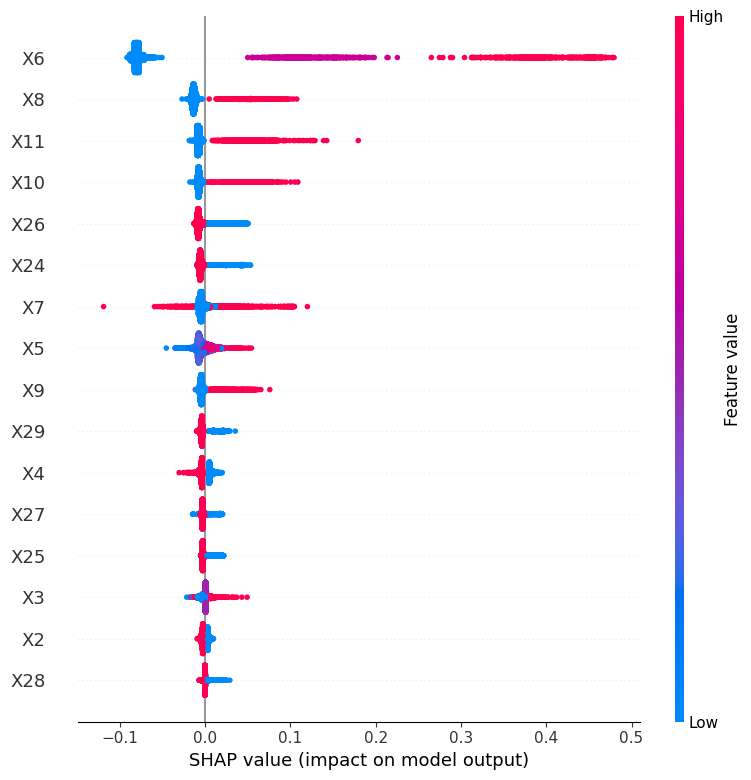

In [7]:
import shap

explainer = shap.Explainer(model, X_train)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

PermutationExplainer explainer: 5118it [02:50, 28.23it/s]                          


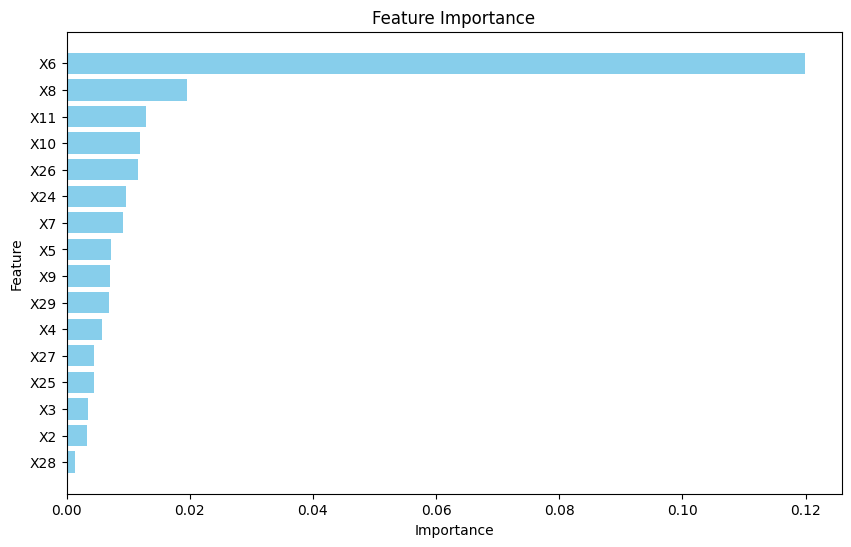

In [9]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Calcular los valores SHAP para el conjunto de prueba
shap_values = explainer.shap_values(X_test)

# Calcular la importancia promedio de las características
mean_abs_shap_values = np.mean(np.abs(shap_values), axis=0)
feature_names = X.columns

# Crear un DataFrame para visualizar la importancia de las características
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': mean_abs_shap_values})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características como una gráfica de barras
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la característica más importante en la parte superior
plt.show()
